Implement a KNN model to classify the animals in to categorie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid' ,palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [30]:
df.drop(columns=['animal name'],inplace=True)

In [31]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.000000,101.0,101.0,101.0,101.000000
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.752475,1.0,1.0,1.0,2.831683
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.322164,0.0,0.0,0.0,2.102709
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,1.0,1.0,1.000000
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,1.0,1.0,1.000000
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0,2.000000
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0,4.000000
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.000000,1.0,1.0,1.0,7.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hair      101 non-null    float64
 1   feathers  101 non-null    float64
 2   eggs      101 non-null    float64
 3   milk      101 non-null    float64
 4   airborne  101 non-null    float64
 5   aquatic   101 non-null    float64
 6   predator  101 non-null    float64
 7   toothed   101 non-null    float64
 8   backbone  101 non-null    float64
 9   breathes  101 non-null    float64
 10  venomous  101 non-null    float64
 11  fins      101 non-null    float64
 12  legs      101 non-null    float64
 13  tail      101 non-null    float64
 14  domestic  101 non-null    float64
 15  catsize   101 non-null    float64
 16  type      101 non-null    int64  
dtypes: float64(16), int64(1)
memory usage: 13.5 KB


In [33]:
df.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

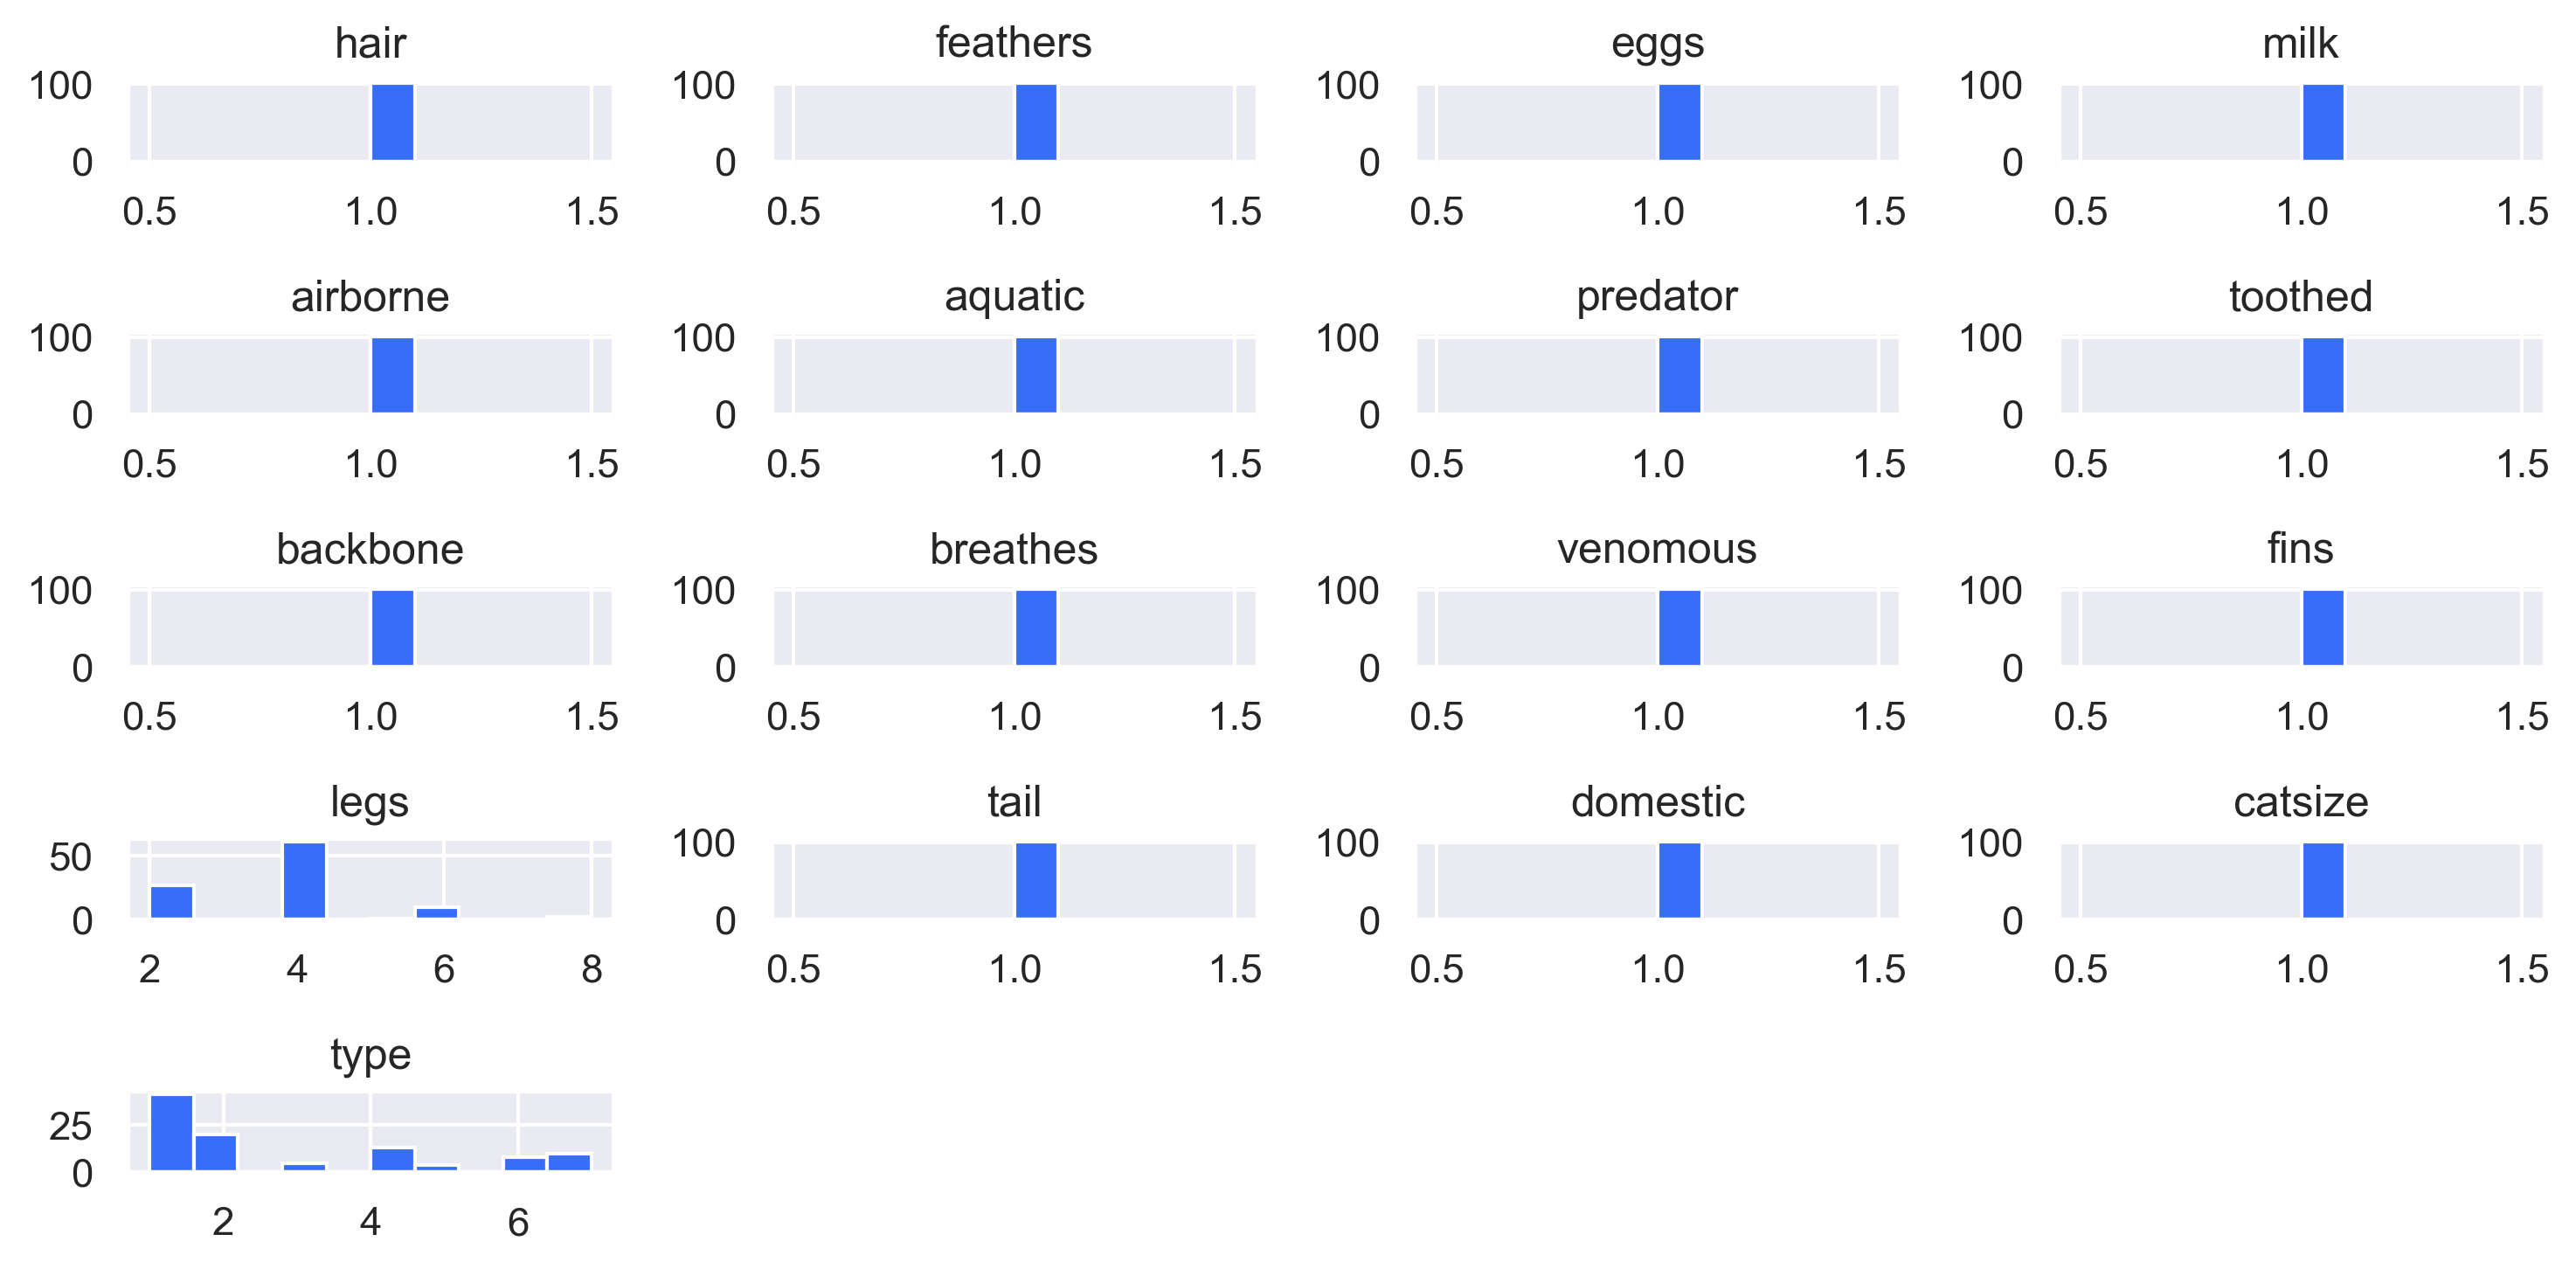

In [34]:
df.hist()
plt.tight_layout()

In [35]:
x = df.iloc[:,1:]
y = df['type']

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

# Model Building


In [37]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [38]:
x

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.87545095],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.87545095],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.55839574],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.87545095],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.99224243],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.39750205]])

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [40]:
ypred

array([1, 2, 1, 2, 1, 7, 1, 2, 4, 5, 2, 1, 1, 1, 1, 1, 1, 1, 7, 3, 2],
      dtype=int64)

In [41]:
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(1.0, 1.0)

# Hyperparameter Tuning for knn

In [42]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))


In [43]:
train_acc

[1.0,
 1.0,
 1.0,
 0.975,
 0.975,
 0.9375,
 0.9375,
 0.9125,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.7875,
 0.7875,
 0.7375,
 0.7375,
 0.7375,
 0.7375,
 0.7375]

In [44]:
test_acc

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.8571428571428571,
 0.8095238095238095,
 0.8095238095238095,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619]

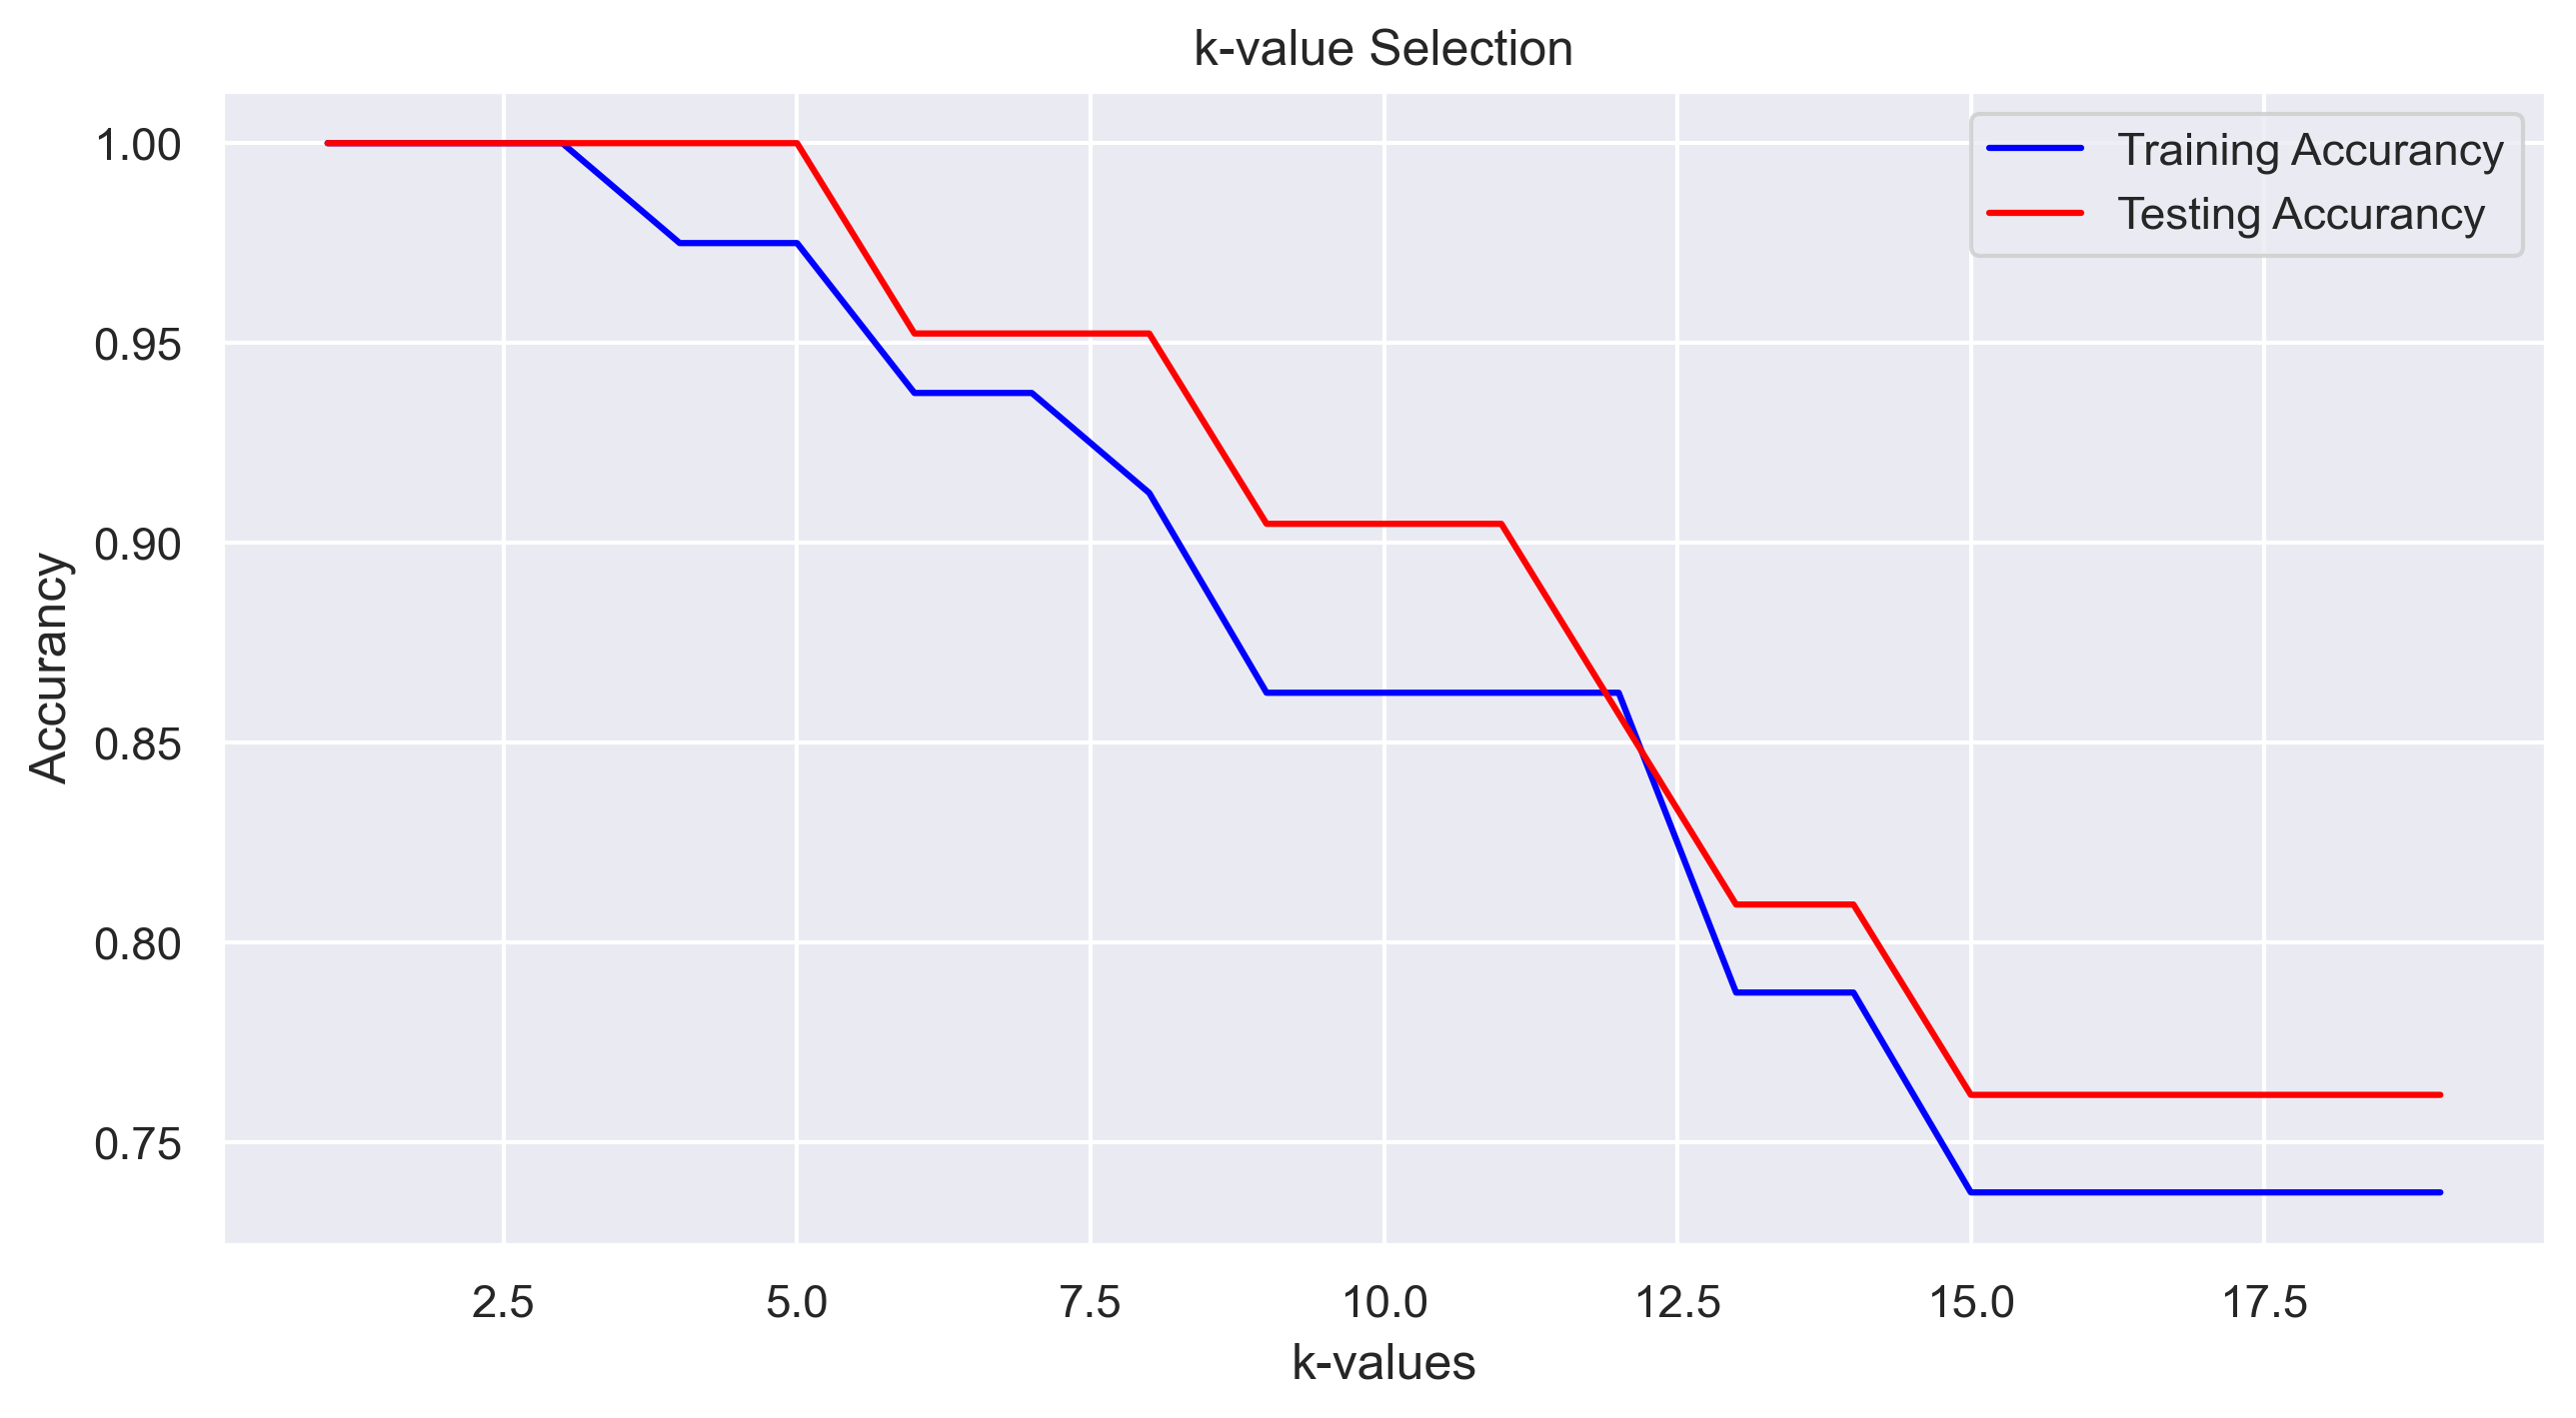

In [45]:
plt.plot(range(1,20),train_acc, color = 'blue', label = 'Training Accurancy')
plt.plot(range(1,20),test_acc, color = 'red', label = 'Testing Accurancy')
plt.xlabel('k-values')
plt.ylabel('Accurancy')
plt.title('k-value Selection')
plt.legend()

In [46]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(xtrain,ytrain)
print(f"Train : {knn.score(xtrain,ytrain)}\nTest : {knn.score(xtest,ytest)}")

Train : 0.8625
Test : 0.8571428571428571


In [47]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [48]:
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64